## Import Libraries

In [1]:
# For dataframe
import pandas as pd
# For numpy operations
import numpy as np
# For linear regression
import statsmodels.api as sm
#For chart
import matplotlib.pyplot as plt

### Read CSV

In [2]:
data_df = pd.read_csv("realtor_data_cleaned.csv", index_col='index')

### Define a function for regression

In [3]:
# Defines a function to perform linear regression and returns the model
# Input to the function is a dataframe df
def perform_linear_regression(df):
    independent_variable_names = ["sqft_lot", "house_size", "bed"]
    
    # Adds a constant for intercept and creates a list with all the columns for independent variables
    independent_variables = sm.add_constant(df[independent_variable_names])
    
    # Puts the dependent variable in a list
    dependent_variable = df[["inf_price"]]
    # creates the linear regression model
    regression_model = sm.OLS(dependent_variable,independent_variables).fit() 
    
    # Get R-squared value, root mean square value that shows how good the model is
    # round to three decimal digits and print, convert to string before print
    print("R-Squared Value: " + str(round(regression_model.rsquared, 3)))

    # Get the coefficients, ina line y=m1*x1+m2*x2+b, b is the intercept, m1,m2... are the coefficients.
    # x1..xn are the independent variables and y is the dependent variable
    # first element in array is intercept      
    intercept = regression_model.params[0]
     # elements from 1 to n are coefficients
    coefficients = regression_model.params[1:]

    # Construct the equation
    # add the y = b + part
    equation = "Price = " + str(round(intercept, 2))
    # go over each independent variable, we also need the index, hence enumerate because we need to get coefficients[i]
    # coefficients[i] gives the value and coeff variable will give the name of the variable, like(house_size etc)
    for i, coeff in enumerate(coefficients):
        # add the m1*x1, m2*x2 etc to the equation.
        equation = equation + " + " + str(round(coeff, 2)) + " * " + independent_variable_names[i]

    # Print the results
    print(f"Equation: {equation}")
    return regression_model
    # return to caller so that caller can call the model with various values

### Filter data by cities and find where house_size is not null because that means it is a home sale

In [4]:
### We know from Tableau that the cities we care are
# OceanCity, Brigantine, Paramus, Montclair, Westfield and we only care about houses
cities_to_filter = ["OceanCity", "Brigantine", "Paramus", "Montclair", "Westfield"]
data_df = data_df[data_df["city"].isin(cities_to_filter)]
# Filter data by cities and find where house_size is not null because house size not null means it is a home sale
data_df = data_df[data_df["house_size"].notna()]
data_df = data_df[data_df["bed"].notna()]

### Run the model for overall  data and for data across all cities

In [5]:
# We want to see how prediction works at each city level and at the overall model level
print("Overall Regression")

# empty data frame to store the rsquare values to plot a graph
rsquare_dataframe = pd.DataFrame(columns=['City', 'RSquared'])
# Call the function for overall df
model = perform_linear_regression(data_df)
# Create a dictionary with city and Rsquared values and then append it to the dataframe to create a new row
new_row = {'City': 'Overall', 'RSquared': round(model.rsquared, 3)}
# Concat the new row
#rsquare_dataframe.append(new_row, ignore_index=True) throw a warning
rsquare_dataframe = pd.concat([rsquare_dataframe, pd.DataFrame(new_row, index=[0])], ignore_index=True)

Overall Regression
R-Squared Value: 0.543
Equation: Price = -115419.49 + 3.88 * sqft_lot + 187.83 * house_size + 156120.52 * bed


In [6]:
### Run the model for each city and calculate required ranges
# we need to calculate price for 3,4 and 5 bedroom houses
# these are all lists
# go over each city, find the model and do the calculation for home price
for city in cities_to_filter:
    city_df = data_df[data_df['city'] == city]
    print("\n\nRegression Statistics for "+city)
    city_model = perform_linear_regression(city_df)
    new_row = {'City': city, 'RSquared': round(city_model.rsquared, 3)}
    rsquare_dataframe = pd.concat([rsquare_dataframe, pd.DataFrame(new_row, index=[0])], ignore_index=True)
rsquare_dataframe = rsquare_dataframe.sort_values(by='RSquared')




Regression Statistics for OceanCity
R-Squared Value: 0.647
Equation: Price = -339845.49 + 80.01 * sqft_lot + 236.05 * house_size + 164728.28 * bed


Regression Statistics for Brigantine
R-Squared Value: 0.451
Equation: Price = 263965.17 + -5.1 * sqft_lot + 304.11 * house_size + -9128.05 * bed


Regression Statistics for Paramus
R-Squared Value: 0.576
Equation: Price = -103031.58 + 0.82 * sqft_lot + 137.64 * house_size + 176773.42 * bed


Regression Statistics for Montclair
R-Squared Value: 0.543
Equation: Price = -56817.09 + 18.32 * sqft_lot + 84.35 * house_size + 147043.52 * bed


Regression Statistics for Westfield
R-Squared Value: 0.652
Equation: Price = -322380.46 + 22.23 * sqft_lot + 254.32 * house_size + 131908.91 * bed


### Plot a graph with RSquared in Y axis and City in X axis

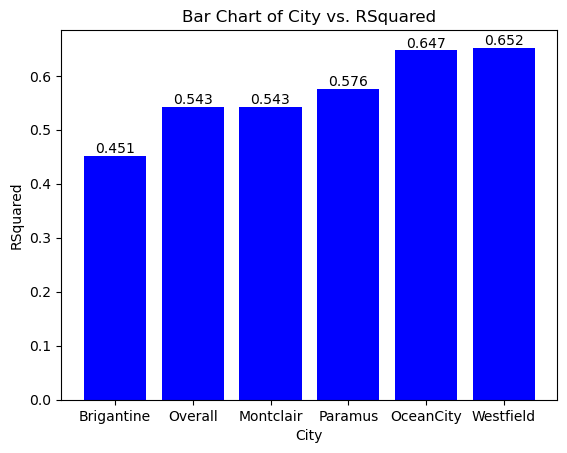

In [7]:
# Type of chart is bar and the values are city and rsquared from the data frame
bars = plt.bar(rsquare_dataframe['City'], rsquare_dataframe['RSquared'], color='blue')

# Title of the chart
plt.title('Bar Chart of City vs. RSquared')
plt.xlabel('City')
plt.ylabel('RSquared')
ax = plt.gca()
ax.bar_label(bars)

plt.show()